In [1]:
import os

import torch
import torchvision
from torchvision.transforms import v2
from torch import nn
from torchsummary import summary

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from PIL import Image
import tqdm.notebook as tqdm

%load_ext autoreload

from data_loaders import *
%autoreload 2
from training_utils import *
%autoreload 2
from cnn_model import *
%autoreload 2

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/Users/nico/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


<Figure size 1500x1000 with 0 Axes>

In [2]:
# Creating the datasets
transform = v2.Compose([
    # v2.RandomResizedCrop(size=(224, 224), antialias=True),
    # v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor(),
    v2.ToDtype(torch.float, scale=True)
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# torchvision.transforms.ToTensor() 


test_prop = 0.0
val_prop = 0.3


labeled_data = CloudDetectionTrain(
    transform=transform
)
dataset_size = len(labeled_data)
dataset_indices = np.arange(dataset_size)

np.random.shuffle(dataset_indices)

# Test / Train split
test_split_index = int(np.floor(test_prop * dataset_size))
trainset_indices, test_idx = dataset_indices[test_split_index:], dataset_indices[:test_split_index]

# Train / Val split
trainset_size = len(trainset_indices)
val_split_index = int(np.floor(val_prop * trainset_size))
train_idx, val_idx = trainset_indices[val_split_index:], trainset_indices[:val_split_index]



batch_size = 64


# NUM_TRAIN = int(len(labeled_data) * proportion_train)
# NUM_TRAIN = NUM_TRAIN - NUM_TRAIN % batch_size


# val_split_index = int(np.floor(proportion_val * dataset_size))
# train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]
test_loader = torch.utils.data.DataLoader(
  dataset=labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.SubsetRandomSampler(test_idx)
)

train_loader = torch.utils.data.DataLoader(
  dataset=labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.SubsetRandomSampler(train_idx)
)

val_loader = torch.utils.data.DataLoader(
  dataset=labeled_data,
  batch_size=batch_size,
  sampler=torch.utils.data.sampler.SubsetRandomSampler(val_idx)
)

img_type = 'raw-derivative.-60'
# img_type = 'raw-original'
# img_type = 'raw-fft'

inference_data = CloudDetectionInference(
    batch_id = 10,
    transform = transform
)
inference_loader = torch.utils.data.DataLoader(
  dataset=inference_data,
  batch_size=batch_size
)


In [13]:
# Training config
learning_rate = 0.001
# momentum=0.9

model = CloudDetection()

#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-6)#, momentum=momentum)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
loss_fn = nn.CrossEntropyLoss()

trainer = Trainer(model, optimizer, loss_fn, train_loader, val_loader, epochs=5, gamma=0.9, do_summary=False);

In [14]:
trainer.train()



Epoch 1


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 3.0416,  acc = 144/331 (43.50%) 
      Train: 	loss = 3.0876,  acc = 364/775 (46.97%)


Epoch 2


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 2.6548,  acc = 146/331 (44.11%) 
      Train: 	loss = 2.6250,  acc = 364/775 (46.97%)


Epoch 3


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 11.0848,  acc = 145/331 (43.81%) 
      Train: 	loss = 10.4705,  acc = 364/775 (46.97%)


Epoch 4


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 2.1901,  acc = 166/331 (50.15%) 
      Train: 	loss = 2.2023,  acc = 416/775 (53.68%)


Epoch 5


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 2.9708,  acc = 197/331 (59.52%) 
      Train: 	loss = 3.0641,  acc = 470/775 (60.65%)


Epoch 6


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.8694,  acc = 260/331 (78.55%) 
      Train: 	loss = 0.8426,  acc = 591/775 (76.26%)


Epoch 7


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6296,  acc = 287/331 (86.71%) 
      Train: 	loss = 0.5973,  acc = 664/775 (85.68%)


Epoch 8


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.5027,  acc = 290/331 (87.61%) 
      Train: 	loss = 0.3806,  acc = 675/775 (87.10%)


Epoch 9


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4652,  acc = 291/331 (87.92%) 
      Train: 	loss = 0.3693,  acc = 664/775 (85.68%)


Epoch 10


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6102,  acc = 294/331 (88.82%) 
      Train: 	loss = 0.5057,  acc = 674/775 (86.97%)


Epoch 11


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 1.0558,  acc = 289/331 (87.31%) 
      Train: 	loss = 0.9254,  acc = 665/775 (85.81%)


Epoch 12


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4759,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.3737,  acc = 693/775 (89.42%)


Epoch 13


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4767,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.3346,  acc = 699/775 (90.19%)


Epoch 14


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4676,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2599,  acc = 706/775 (91.10%)


Epoch 15


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3193,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.3002,  acc = 706/775 (91.10%)


Epoch 16


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4437,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.3110,  acc = 695/775 (89.68%)


Epoch 17


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4522,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2491,  acc = 714/775 (92.13%)


Epoch 18


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.5275,  acc = 301/331 (90.94%) 
      Train: 	loss = 0.2757,  acc = 696/775 (89.81%)


Epoch 19


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6728,  acc = 301/331 (90.94%) 
      Train: 	loss = 0.2706,  acc = 704/775 (90.84%)


Epoch 20


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4600,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2479,  acc = 697/775 (89.94%)


Epoch 21


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3472,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2412,  acc = 698/775 (90.06%)


Epoch 22


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3591,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2569,  acc = 711/775 (91.74%)


Epoch 23


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4021,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2988,  acc = 708/775 (91.35%)


Epoch 24


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4214,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.3361,  acc = 699/775 (90.19%)


Epoch 25


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4558,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.3140,  acc = 693/775 (89.42%)


Epoch 26


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3510,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2725,  acc = 697/775 (89.94%)


Epoch 27


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4100,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.3084,  acc = 689/775 (88.90%)


Epoch 28


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4382,  acc = 295/331 (89.12%) 
      Train: 	loss = 0.3012,  acc = 690/775 (89.03%)


Epoch 29


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3268,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2516,  acc = 698/775 (90.06%)


Epoch 30


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3505,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2694,  acc = 709/775 (91.48%)


Epoch 31


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3375,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2866,  acc = 704/775 (90.84%)


Epoch 32


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3692,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2900,  acc = 700/775 (90.32%)


Epoch 33


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4026,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2463,  acc = 708/775 (91.35%)


Epoch 34


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4844,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2812,  acc = 699/775 (90.19%)


Epoch 35


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6152,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.3341,  acc = 700/775 (90.32%)


Epoch 36


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4119,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2610,  acc = 699/775 (90.19%)


Epoch 37


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3697,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2595,  acc = 701/775 (90.45%)


Epoch 38


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.5033,  acc = 292/331 (88.22%) 
      Train: 	loss = 0.3557,  acc = 675/775 (87.10%)


Epoch 39


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3446,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2453,  acc = 703/775 (90.71%)


Epoch 40


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3659,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2487,  acc = 707/775 (91.23%)


Epoch 41


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4571,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2427,  acc = 708/775 (91.35%)


Epoch 42


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3471,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2591,  acc = 701/775 (90.45%)


Epoch 43


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3441,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2647,  acc = 698/775 (90.06%)


Epoch 44


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3989,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2832,  acc = 694/775 (89.55%)


Epoch 45


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3881,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2916,  acc = 698/775 (90.06%)


Epoch 46


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3259,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2431,  acc = 710/775 (91.61%)


Epoch 47


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3441,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2460,  acc = 704/775 (90.84%)


Epoch 48


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3450,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2553,  acc = 704/775 (90.84%)


Epoch 49


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.5342,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2341,  acc = 705/775 (90.97%)


Epoch 50


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6103,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.3449,  acc = 686/775 (88.52%)


Epoch 51


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3412,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2653,  acc = 700/775 (90.32%)


Epoch 52


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3875,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2337,  acc = 707/775 (91.23%)


Epoch 53


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3810,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.3420,  acc = 700/775 (90.32%)


Epoch 54


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3973,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2499,  acc = 704/775 (90.84%)


Epoch 55


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3325,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2518,  acc = 701/775 (90.45%)


Epoch 56


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4011,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2772,  acc = 698/775 (90.06%)


Epoch 57


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.6947,  acc = 295/331 (89.12%) 
      Train: 	loss = 0.2899,  acc = 688/775 (88.77%)


Epoch 58


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3723,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2716,  acc = 701/775 (90.45%)


Epoch 59


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3604,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2502,  acc = 700/775 (90.32%)


Epoch 60


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4225,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2334,  acc = 709/775 (91.48%)


Epoch 61


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3393,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2384,  acc = 705/775 (90.97%)


Epoch 62


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4487,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2500,  acc = 703/775 (90.71%)


Epoch 63


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3271,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2496,  acc = 706/775 (91.10%)


Epoch 64


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3475,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2585,  acc = 703/775 (90.71%)


Epoch 65


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4894,  acc = 295/331 (89.12%) 
      Train: 	loss = 0.3381,  acc = 681/775 (87.87%)


Epoch 66


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3463,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2566,  acc = 699/775 (90.19%)


Epoch 67


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3511,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2779,  acc = 698/775 (90.06%)


Epoch 68


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4298,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2653,  acc = 699/775 (90.19%)


Epoch 69


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3306,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2544,  acc = 701/775 (90.45%)


Epoch 70


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3266,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2578,  acc = 703/775 (90.71%)


Epoch 71


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4616,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2839,  acc = 696/775 (89.81%)


Epoch 72


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3290,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2529,  acc = 711/775 (91.74%)


Epoch 73


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.5024,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2802,  acc = 694/775 (89.55%)


Epoch 74


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4082,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2738,  acc = 697/775 (89.94%)


Epoch 75


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3911,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2622,  acc = 701/775 (90.45%)


Epoch 76


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3848,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2544,  acc = 711/775 (91.74%)


Epoch 77


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3404,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2419,  acc = 700/775 (90.32%)


Epoch 78


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3779,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2855,  acc = 700/775 (90.32%)


Epoch 79


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3461,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2635,  acc = 703/775 (90.71%)


Epoch 80


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3869,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2617,  acc = 705/775 (90.97%)


Epoch 81


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3136,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2402,  acc = 709/775 (91.48%)


Epoch 82


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4219,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2507,  acc = 707/775 (91.23%)


Epoch 83


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3894,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2820,  acc = 697/775 (89.94%)


Epoch 84


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3773,  acc = 296/331 (89.43%) 
      Train: 	loss = 0.2784,  acc = 697/775 (89.94%)


Epoch 85


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4161,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2814,  acc = 699/775 (90.19%)


Epoch 86


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3693,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2773,  acc = 702/775 (90.58%)


Epoch 87


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.4500,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2435,  acc = 704/775 (90.84%)


Epoch 88


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3454,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2668,  acc = 708/775 (91.35%)


Epoch 89


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3723,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2608,  acc = 700/775 (90.32%)


Epoch 90


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3566,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2505,  acc = 702/775 (90.58%)


Epoch 91


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3395,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2496,  acc = 704/775 (90.84%)


Epoch 92


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3452,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2440,  acc = 712/775 (91.87%)


Epoch 93


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3484,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2538,  acc = 702/775 (90.58%)


Epoch 94


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3539,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2634,  acc = 699/775 (90.19%)


Epoch 95


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3655,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2788,  acc = 700/775 (90.32%)


Epoch 96


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3254,  acc = 298/331 (90.03%) 
      Train: 	loss = 0.2489,  acc = 702/775 (90.58%)


Epoch 97


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3506,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2447,  acc = 712/775 (91.87%)


Epoch 98


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3365,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2536,  acc = 703/775 (90.71%)


Epoch 99


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3871,  acc = 299/331 (90.33%) 
      Train: 	loss = 0.2411,  acc = 710/775 (91.61%)


Epoch 100


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 0.3929,  acc = 297/331 (89.73%) 
      Train: 	loss = 0.2532,  acc = 704/775 (90.84%)
Done training


In [80]:
labeled_data.dsl_df
feature_uid = labeled_data.dsl_df.loc[:, 'feature_uid'].iloc[0]
pano_feature_fpath = labeled_data.dataset_manager.get_pano_feature_fpath(feature_uid, 'fft')
pano_feature_fpath
labeled_data[0][0]
num_clear = len(labeled_data.dsl_df.loc[labeled_data.dsl_df.label == 'clear_night_sky'])
num_cloudy = len(labeled_data.dsl_df.loc[labeled_data.dsl_df.label == 'not_clear_cloudy'])
print(f'Percent cloudy = {num_cloudy / len(labeled_data)} ({num_cloudy} / {len(labeled_data)})')

Percent cloudy = 0.5406871609403255 (598 / 1106)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


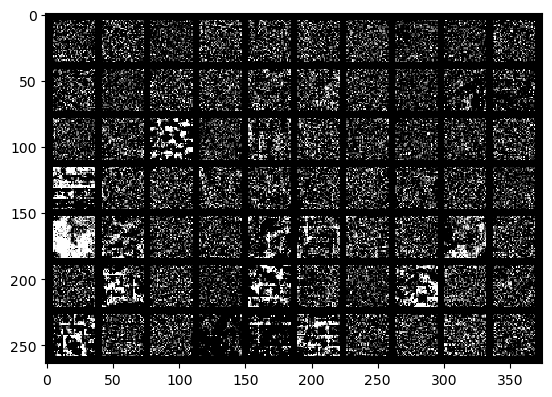

In [66]:
images = [labeled_data[i][0][img_type] for i in np.random.choice(len(labeled_data), size=70, replace=False)]
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=10, padding=5).numpy().transpose((1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


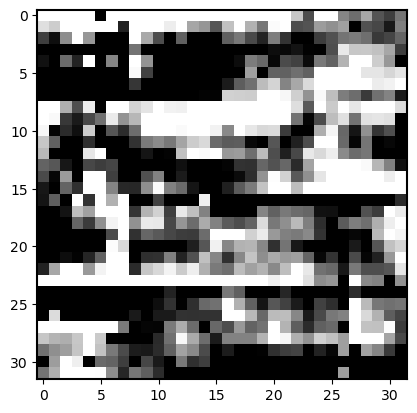

In [90]:
images = [inference_data[i][img_type] for i in np.random.choice(len(inference_data), size=1, replace=False)]
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=10, padding=5).numpy().transpose((1, 2, 0)), vmin=-0.5, vmax=0.5, cmap='icefire')

In [5]:
# ---- Plotting ----
plt.figure(figsize=(15, 10))

def plot_loss(log, save=True):
    train_loss = log['train']['loss']
    val_loss = log['val']['loss']
    
    plt.plot(train_loss, label="training loss")
    plt.plot(val_loss, label="validation loss")
    
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    
    plt.title("Cloud-Detection Training and Validation Loss vs Epoch")
    if save:
        plt.savefig("Loss")
        plt.close()

def plot_accuracy(log, save=True):
    train_acc = log['train']['acc']
    val_acc = log['val']['acc']
    
    plt.plot(train_acc, label="training accuracy")
    plt.plot(val_acc, label="validation accuracy")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    
    plt.title("Cloud-Detection Training and Validation Accuracy vs Epoch")
    if save:
        plt.savefig(f"Accuracy")
        plt.close()
        
def plot_cloudy_mistakes(log, save=True):
    train_acc = log['train']['cloudy_wrong']
    val_acc = log['val']['cloudy_wrong']
    
    plt.plot(train_acc, label="training cloudy_wrong")
    plt.plot(val_acc, label="validation cloudy_wrong")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    
    plt.title("Cloud-Detection Training and percent cloudy misclassifications vs Epoch")
    if save:
        plt.savefig(f"cloudy_wrong")
        plt.close()

def plot_clear_mistakes(log, save=True):
    train_acc = log['train']['clear_wrong']
    val_acc = log['val']['clear_wrong']
    
    plt.plot(train_acc, label="training clear_wrong")
    plt.plot(val_acc, label="validation clear_wrong")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    
    plt.title("Cloud-Detection Training and percent clear misclassifications vs Epoch")
    if save:
        plt.savefig(f"clear_wrong")
        plt.close()

<Figure size 1500x1000 with 0 Axes>

In [12]:
# Utils

def get_device(verbose=False):
    if torch.cuda.is_available():
        device = "cuda"
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = "mps"
    else:
        "cpu"
    if verbose: print(f"Using device {device}")
    return device


def make_training_log():
    training_log = {
        'train': {
            'loss': [],
            'acc': [],
            'cloudy_wrong': [],
            'clear_wrong': []
        },
        'val': {
            'loss': [],
            'acc': [],
            'cloudy_wrong': [],
            'clear_wrong': []
        }
    }
    
    return training_log

In [13]:
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight.data, gain=nn.init.calculate_gain('relu'))
    if isinstance(m, nn.LazyLinear):
        nn.init.xavier_uniform_(m, gain=nn.init.calculate_gain('relu'))
    elif isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m, gain=nn.init.calculate_gain('relu'))
    elif isinstance(m, nn.BatchNorm1d):
        nn.init.xavier_uniform_(m, gain=nn.init.calculate_gain('relu'))
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.xavier_uniform_(m.weight.data, gain=nn.init.calculate_gain('relu'))

device = get_device()

In [14]:
cloudy_wrong_data = []
clear_wrong_data = []
def record_acc_and_loss(model, loss_fn, data_loader, log, data_set):
    ncorrect = 0
    nsamples = 0
    loss_total = 0
    ncloudy_wrong = 0
    nclear_wrong = 0
    
    model.eval()
    with torch.no_grad():
        for img_data, y in data_loader:
            x = img_data[img_type]
            x = x.to(device=device, dtype=torch.float) 
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            
            loss = loss_fn(scores, y)
            loss_total += loss.item()
            
            predictions = torch.argmax(scores, dim=1)
            ncorrect += (predictions == y).sum()
            
            # if ((predictions == 1) & (predictions != y)).cpu().any():
            #     for im, pred in zip(x, predictions):
            #         cloudy_wrong_data.append(im.cpu())
            # elif ((predictions == 0) & (predictions != y)).cpu().any():
            #     for i in range(len(predictions)):
            #         if predictions[i] == 0 and predictions[i] != y[i]:
            #             clear_wrong_data.append(x[i].cpu())
            for i in range(len(predictions)):
                    if predictions[i] == 1 and predictions[i] != y[i]:
                        cloudy_wrong_data.append(x[i].cpu())
                    elif predictions[i] == 0 and predictions[i] != y[i]:
                        clear_wrong_data.append(x[i].cpu())

            ncloudy_wrong += ((predictions == 1) & (predictions != y)).cpu().sum()
            nclear_wrong += ((predictions == 0) & (predictions != y)).cpu().sum()
            nsamples += predictions.size(0)
            
        avg_loss = loss_total / len(data_loader)
        acc = float(ncorrect) / nsamples
        
        log[data_set]['loss'].append(avg_loss)
        log[data_set]['acc'].append(acc)
        log[data_set]['cloudy_wrong'].append(ncloudy_wrong / max(nsamples - float(ncorrect), 1))
        log[data_set]['clear_wrong'].append(nclear_wrong / max(nsamples - float(ncorrect), 1))

        
        report = "{0}: \tloss = {1:.4f},  acc = {2}/{3} ({4:.2f}%)".format(data_set.capitalize().rjust(10), avg_loss, ncorrect, nsamples, acc * 100)
        return report


def train(model, optimizer, loss_fn, epochs=1, gamma=0.9):
    """
    Train the given model and report accuracy and loss during training.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: dictionary of train and validation loss and accuracy for each epoch.
    """
    # Move model to device
    model = model.to(device=device)
    
    # Init LR schedulers
    scheduler_exp = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    scheduler_plat = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    
    training_log = make_training_log()
    for e in range(1, epochs + 1):
        print(f"\n\nEpoch {e}")
        for img_data, y in tqdm.tqdm(train_loader, unit="batches"):
            model.train()
            x = img_data[img_type]
            x = x.to(device=device, dtype=torch.float) 
            y = y.to(device=device, dtype=torch.long)
            
            # Forward pass: compute class scores
            scores = model(x)
            loss = loss_fn(scores, y)
            
            # Remove the gradients from the previous step
            optimizer.zero_grad() 
            
            # Backward pass: update weights
            loss.backward()
            optimizer.step()
        
        # Update log of train and validation accuracy and loss. Print progress.
        train_report = record_acc_and_loss(model, loss_fn, train_loader, training_log, 'train')
        valid_report = record_acc_and_loss(model, loss_fn, val_loader, training_log, 'val')
        print(valid_report, '\n', train_report)
        
        # Save model parameters with best validation accuracy
        val_accs = training_log['val']['acc']
        if val_accs[-1] == max(val_accs):
            torch.save(model.state_dict(), "../model_training/best_cloud_detection_model.pth")
         
        # Update optimizer
        scheduler_exp.step()
        scheduler_plat.step(training_log['val']['loss'][-1])
    print('Done training')
    return training_log

In [68]:
class CloudDetection(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 126, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(126),
            nn.Dropout2d(p=0.1),

            nn.Conv2d(126, 126, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(126),
            nn.Dropout2d(p=0.1),
            
            nn.Conv2d(126, 126, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(126),
            nn.Dropout2d(p=0.1),
            
            nn.MaxPool2d(kernel_size=2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(126, 200, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(200),
            nn.Dropout2d(p=0.1),

            nn.Conv2d(200, 200, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(200),
            nn.Dropout2d(p=0.1),
            
            nn.Conv2d(200, 200, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(200),
            nn.Dropout2d(p=0.1),
            
            nn.MaxPool2d(kernel_size=2),
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(200, 256, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            # nn.Dropout2d(p=0.1),

            nn.Conv2d(256, 256, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            # nn.Dropout2d(p=0.1),
            
            nn.Conv2d(256, 256, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            # nn.Dropout2d(p=0.1),

            nn.MaxPool2d(kernel_size=2),
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            # nn.Dropout2d(p=0.1),
            
            nn.Conv2d(512, 512, 3, stride=1, padding='same', groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            # nn.Dropout2d(p=0.1),

            nn.Conv2d(512, 512, 3, stride=1, groups=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            # nn.Dropout2d(p=0.1),
            
            nn.MaxPool2d(kernel_size=2)
        )

        self.flatten = nn.Flatten()

        self.linear_stack = nn.Sequential(
            nn.LazyLinear(2000),
            nn.ReLU(),
            nn.BatchNorm1d(2000),
            nn.Dropout1d(p=0.2),
            
            nn.LazyLinear(1000),
            nn.ReLU(),
            nn.BatchNorm1d(1000),
            nn.Dropout1d(p=0.2),

            nn.LazyLinear(512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            # nn.Dropout1d(p=0.1),
            
            nn.LazyLinear(256),
            nn.ReLU(),
            nn.BatchNorm1d(256),

            nn.LazyLinear(4),
        )
        
        # self.cnns = torch.nn.ModuleList([torch.nn.Sequential(self.conv1(), self.conv2(), self.conv3(), self.flatten()) for _ in range(3)])
        
    def forward_convolve(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.flatten(out)
    
    def forward_fc(self, xs: list[torch.Tensor]):
        outs = []
        for x in xs:
            pass
        # out = self.conv1(x)
        # out = self.conv2(out)
        # out = self.conv3(out)
        # out = self.conv4(out)
        # out = self.flatten(out)
        #print(out.shape)
        # self.foward_convolve(
        
        out = self.linear_stack(out)
        return out
            
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.flatten(out)
        # print(out.shape)
        
        out = self.linear_stack(out)
        return out
    
    

def get_model_summary(dummy_model, labeled_data, input_shape=(3, 32, 32)):
    """Get the current model configuration."""
    dummy_loader = torch.utils.data.DataLoader(
      dataset=labeled_data,
      batch_size=1,
      sampler=torch.utils.data.SubsetRandomSampler(range(3))
    )
    dummy_model.to(device=get_device())
    dummy_model.eval()
    with torch.no_grad():
        img_data, y = next(iter(dummy_loader))
        x = img_data[img_type]
        x = x.to(device=device, dtype=torch.float)
        y = y.to(device=device, dtype=torch.long)
        scores = dummy_model(x)
    try:
        s = summary(dummy_model)
        with open('model_summary.txt', 'w') as f:
            f.write(str(s))
    except ValueError as verr:
        print(verr)
    finally:
        dummy_model.cpu()
        del dummy_loader

get_model_summary(CloudDetection(), labeled_data)

/Users/nico/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


ValueError: expected 4D input (got 3D input)

In [32]:
# Training config
learning_rate = 0.001
# momentum=0.9

model = CloudDetection()

#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-6)#, momentum=momentum)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
loss_fn = nn.CrossEntropyLoss()

training_log = train(model, optimizer, loss_fn, epochs=1, gamma=0.9)


plot_accuracy(training_log)
plot_loss(training_log)
plot_cloudy_mistakes(training_log)
plot_clear_mistakes(training_log)
plt.close()



Epoch 1


/Users/nico/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/13 [00:00<?, ?batches/s]

       Val: 	loss = 1.2993,  acc = 228/331 (68.88%) 
      Train: 	loss = 1.3622,  acc = 500/775 (64.52%)
Done training


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


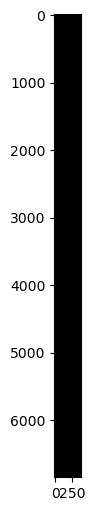

In [97]:
# Create the test dataset
# testing_data = 
# CloudDetectionTest(
#     transform=transform, # NOTE: Make sure transform is the same as the one used in the training dataset.
# )
plt.figure(figsize=(12,6))
processed = [img / 255 for img in clear_wrong_data]
plt.imshow(torchvision.utils.make_grid(torch.stack(processed[:len(processed)]), nrow=10, padding=5).numpy().transpose((1, 2, 0)))

In [10]:
# test_dataloader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=False)
# Store a numpy vector of the predictions for the test set in the variable `predictions`.
model = None
model = CloudDetection()
model.load_state_dict(torch.load('best_cloud_detection_model.pth'))
model.to(device)
model.eval()
predictions = np.array([], dtype=int)
true_labels = []
with torch.no_grad():
    model.eval() # Put model in eval mode
    for img_data in tqdm.tqdm(inference_loader, unit="batch"):
        x = img_data[img_type]
        x = x.float().to(device)
        pred = model(x)
        # predictions = torch.cat((predictions, torch.argmax(pred, dim=1)))
        predictions = np.concatenate((predictions, torch.argmax(pred, dim=1).to('cpu').numpy()))
print(predictions)

print(len(inference_loader.dataset))


/Users/nico/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/2 [00:00<?, ?batch/s]

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0]
78


In [11]:
inference_data.inference_session.unlabeled_df['feature_uid']

0     a98260bfda17eba9b60a12f2179d690bab7ad6ee
1     4afb68a8e0ea92906c59a95164f6debc41e2e51a
2     d72b18b9fe3905bf607dd78d1226d981f8f5677f
3     a110c71125454d5c837ba79182f0d4218f5b6cb3
4     9e54b5eb7a73fe3f07eed4f8d28118e2c9c9eb0f
                        ...                   
73    b2e8935dfbdf0801041cf1ef4cf84c76a6a3fd27
74    8a49bfe783964614393581134cd432a9270e77d0
75    95bb05a8c5c27380d4680cf33b1377390d06d9f9
76    fb0bf1b90778954c890cfa414d20c7f12cbf54f0
77    4d4d20bcc2906fb0bc695a8e155748f155a3c200
Name: feature_uid, Length: 78, dtype: object

In [35]:
inference_data.inference_session.unlabeled_df

,feature_uid,is_labeled
0,a98260bfda17eba9b60a12f2179d690bab7ad6ee,True
1,4afb68a8e0ea92906c59a95164f6debc41e2e51a,True
2,d72b18b9fe3905bf607dd78d1226d981f8f5677f,True
3,a110c71125454d5c837ba79182f0d4218f5b6cb3,True
4,9e54b5eb7a73fe3f07eed4f8d28118e2c9c9eb0f,True
...,...,...
73,b2e8935dfbdf0801041cf1ef4cf84c76a6a3fd27,True
74,8a49bfe783964614393581134cd432a9270e77d0,True
75,95bb05a8c5c27380d4680cf33b1377390d06d9f9,True
76,fb0bf1b90778954c890cfa414d20c7f12cbf54f0,True


In [33]:
inference_data.inference_session.add_labels(predictions)

In [36]:
inference_data.inference_session.save_progress()

In [ ]:
# Generate predictions.csv file.
import pandas as pd

predictions = predictions.cpu()

if isinstance(predictions, np.ndarray):
    predictions = predictions.astype(int)
else:
    predictions = np.array(predictions, dtype=int)
assert predictions.shape == (len(testing_data),), "Predictions were not the correct shape"
df = pd.DataFrame({'Category': predictions})

